# Laboratorio n° 3 - Circuito 1

Se realizan los cálculos de un circuito $VFA-VFA$ con un circuito LM324.

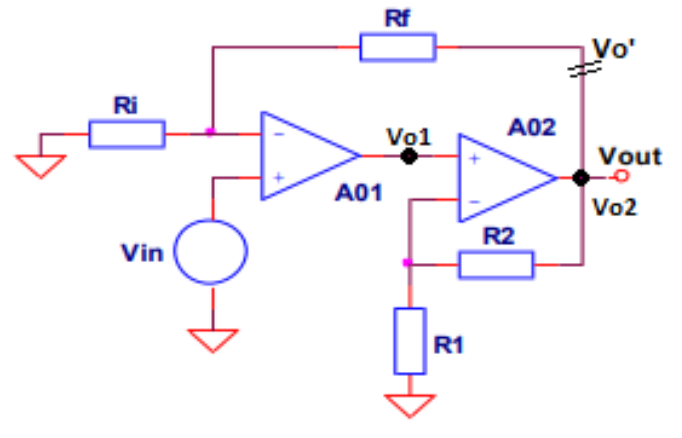

In [1]:
from IPython.display import Image

Image(filename= "img/Circuito 1.png")

Se debe obtener la función tranferencia.

In [2]:
import sympy as sym
# import control as ct
# import numpy as np

Vin, Vo, Vo1, Vo2= sym.symbols('V_{in}, V_{o}, V_{o1}, V_{op}')
Ad, Av= sym.symbols('A_{d}(s), A_{v}')
R1, R2= sym.symbols('R_{1}, R_{2}')

Se debe obtener las expresiones de las tensiones $V_{o1}$ y $V_{o2}$.

In [3]:
Vo1= Ad*Vin


Vo2= Vo1*(1+(R2/R1))
Vo2

# Obtengo la expresión de la tensión de salida 
equ_Vo= sym.Eq(Vo, Vo2)
equ_Vo

# Despejo Vin
s_Vin= sym.solve(equ_Vo, Vo)

# Obtengo función transferencia.
Av= sym.Eq((Vo/Vin), s_Vin[0]/Vin)
Av

Eq(V_{o}/V_{in}, A_{d}(s)*(R_{1} + R_{2})/R_{1})

Se calcula la ganancia de lazo T.

In [4]:
V1, V2, Vop= sym.symbols('V^{+}, V^{-}, V_{op}')
Ri, Rf, T= sym.symbols('R_{i}, R_{f}, T')

V2= Vop*((Ri/Rf)+1)

# V^{+}= 0
V1= 0

# Vo1
Vo1= Ad*(V1-V2)

Vout= Vo1*(1+(R2/R1))

equ_T= sym.Eq(T, Vout/Vop)

sym.print_latex(equ_T)

T_= equ_T.rhs

T = - A_{d}(s) \left(1 + \frac{R_{2}}{R_{1}}\right) \left(1 + \frac{R_{i}}{R_{f}}\right)


### Función transferencia

In [5]:
Avf, FT= sym.symbols('A_{vf}, FT')

FT= Av.rhs/(1-(T_))

A_vf= sym.Eq(Avf, FT)
A_vf

Eq(A_{vf}, A_{d}(s)*(R_{1} + R_{2})/(R_{1}*(A_{d}(s)*(1 + R_{2}/R_{1})*(1 + R_{i}/R_{f}) + 1)))

Se toma el límite de $A_{d}(s)$ cuando tiende a infinito.

In [6]:
lim= sym.limit(A_vf.rhs, Ad, sym.oo)
sim= sym.simplify(lim)
A_vf= sym.Eq(Avf, sim)
A_vf

Eq(A_{vf}, R_{f}/(R_{f} + R_{i}))